In [1]:
import matplotlib.pyplot as plt
from pandas_datareader import wb
import pandas as pd
import statsmodels.formula.api as smf
from src.utils import apply_matplotlib_settings, reload_module

apply_matplotlib_settings()

In [2]:
search = wb.search("energy imports")
# Should be "energy imports as percentage of consumption"
ind_id = search.iloc[0, :]["id"]
ei = wb.download(indicator=[ind_id], country="all")
# Index dtype corrections
for level, dtype in enumerate([str, int]):
    ei.index = ei.index.set_levels(
        ei.index.levels[level].astype(dtype), level=level
    )
# Column name corrections
column_name_remaps = dict(zip(ei.columns, ["energy_imports"]))
ei = ei.rename(columns=column_name_remaps)

ei.head(10)

energy_imports
country                     year                
Africa Eastern and Southern 2005      -35.939423
                            2004      -31.161816
                            2003      -32.419994
Africa Western and Central  2005     -108.528981
                            2004     -111.508331
                            2003     -108.572205
Arab World                  2005     -255.422584
                            2004     -258.618606
                            2003     -256.861651
Caribbean small states      2005      -76.069921

In [3]:
ei_std = (
    ei.groupby("country")
    .std()
    .sort_values(by="energy_imports", ascending=False)
    .dropna()
)
ei_std = ei_std.rename(columns={"energy_imports": "std"})
ei_std_head = ei.loc[ei_std.index, :]
ei_std_head

energy_imports
country   year                
Angola    2005     -735.864295
          2004     -555.809535
          2003     -501.436656
Gabon     2005     -440.455993
          2004     -518.499728
...                        ...
Curacao   2004       99.873258
          2003       99.865965
Gibraltar 2005      100.000000
          2004      100.000000
          2003      100.000000

[561 rows x 1 columns]

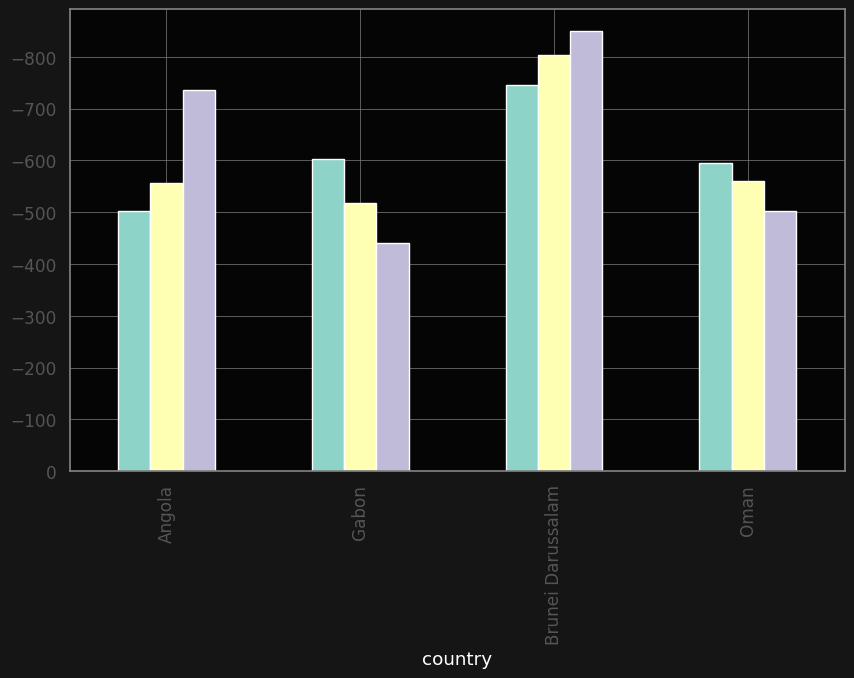

In [4]:
fig, ax = plt.subplots()
ei_std_head.head(12).unstack().plot(kind="bar", ax=ax)
ax.legend().remove()
ax.invert_yaxis()
fig.show()

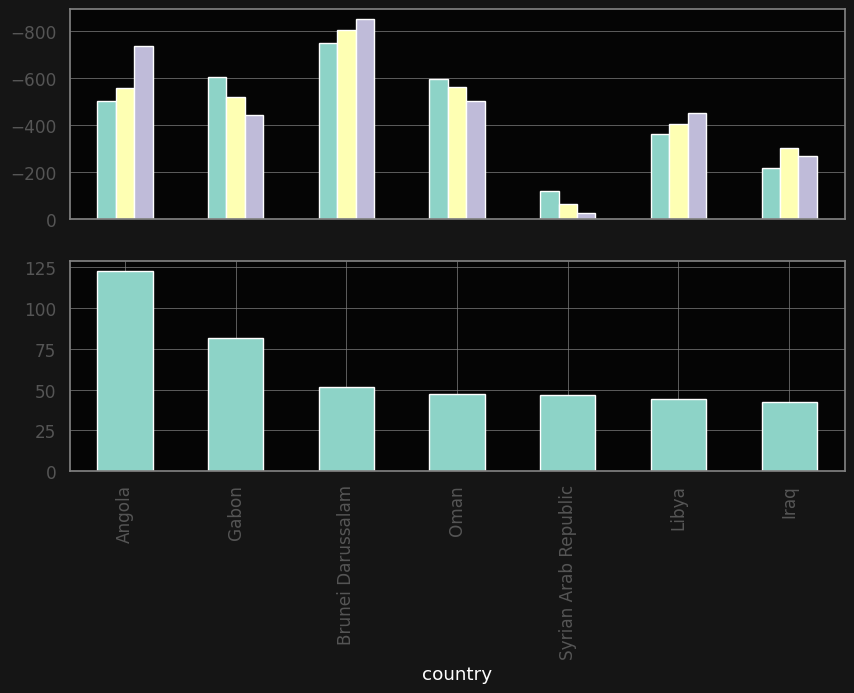

In [5]:
apply_matplotlib_settings = reload_module(
    "src/utils", "apply_matplotlib_settings"
)
apply_matplotlib_settings()

fig, ax = plt.subplots(2, 1)
ei_w_std = ei.join(ei_std)
count = 21
unstacked = ei_w_std.sort_values("std", ascending=False).head(count).unstack()
unstacked[["energy_imports"]].plot(kind="bar", ax=ax[0])
ei_std.sort_values("std", ascending=False).head(int(count / 3)).plot(
    kind="bar", ax=ax[1]
)
ax[0].get_xaxis().set_visible(False)
ax[0].invert_yaxis()
ax[0].get_legend().remove()
ax[1].get_legend().remove()
fig.show()